In [1]:
###### import requests
from datetime import datetime
import pandas as pd

# Define the API URL and your API key
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
api_key = "5fbc9f97-6008-4d0c-8e01-129f10caf61e"

# Define your parameters (optional)
parameters = {
  'start': '1', # Starting record for pagination
  'limit': '10', # Number of cryptocurrencies per page
  'convert': 'USD' # Convert prices to USD
}

# Define your headers with the API key
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}

# Make a GET request to the API
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Get the current date and time
    now = datetime.now()
    timestamp = now.strftime("%Y-%m-%d %H:%M:%S")
    print("Timestamp:", timestamp)
    
    # Create a list to store cryptocurrency data
    crypto_data = []
    
    # Collect information about the first 10 cryptocurrencies
    for crypto in data['data']:
        crypto_info = {
            'Name': crypto['name'],
            'Symbol': crypto['symbol'],
            'Price': crypto['quote']['USD']['price'],
            'Market Cap': crypto['quote']['USD']['market_cap'],
            '24h Volume': crypto['quote']['USD']['volume_24h']
        }
        crypto_data.append(crypto_info)
    
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(crypto_data)
    
    # Display the DataFrame
    print(df)
else:
    # Print the error message if the request was not successful
    print("Error:", response.json()['status']['error_message'])


NameError: name 'requests' is not defined

In [3]:
pip install requests pandas plotly


Note: you may need to restart the kernel to use updated packages.


Timestamp: 2024-11-19 09:51:49
          Name    Market Cap
0      Bitcoin  1.799359e+12
1     Ethereum  3.799092e+11
2  Tether USDt  1.282216e+11
3       Solana  1.139366e+11
4          BNB  8.928731e+10
5          XRP  6.436446e+10
6     Dogecoin  5.459500e+10
7         USDC  3.732540e+10
8      Cardano  2.587759e+10
9         TRON  1.749682e+10


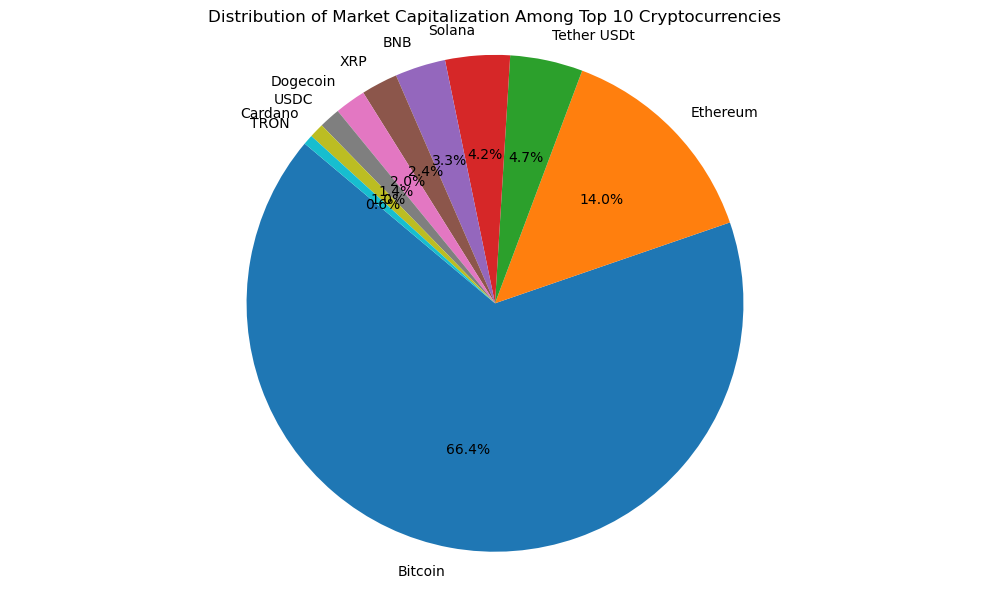

In [4]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Define the API URL and your API key
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
api_key = "5fbc9f97-6008-4d0c-8e01-129f10caf61e"

# Define your parameters (optional)
parameters = {
  'start': '1', # Starting record for pagination
  'limit': '10', # Number of cryptocurrencies per page
  'convert': 'USD' # Convert prices to USD
}

# Define your headers with the API key
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}

# Make a GET request to the API
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Get the current date and time
    now = datetime.now()
    timestamp = now.strftime("%Y-%m-%d %H:%M:%S")
    print("Timestamp:", timestamp)
    
    # Create a list to store cryptocurrency data
    crypto_data = []
    
    # Collect information about the first 10 cryptocurrencies
    for crypto in data['data']:
        crypto_info = {
            'Name': crypto['name'],
            'Market Cap': crypto['quote']['USD']['market_cap'],
        }
        crypto_data.append(crypto_info)
    
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(crypto_data)
    
    # Display the DataFrame
    print(df)
    
    # Plotting
    plt.figure(figsize=(10,6))
    plt.pie(df['Market Cap'], labels=df['Name'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Distribution of Market Capitalization Among Top 10 Cryptocurrencies')
    plt.tight_layout()
    plt.show()
    
else:
    # Print the error message if the request was not successful
    print("Error:", response.json()['status']['error_message'])


In [5]:
import requests
import pandas as pd

def get_historical_data(api_key):
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
    parameters = {
        'start': '1',
        'limit': '10',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api_key,
    }
    response = requests.get(url, headers=headers, params=parameters)
    
    if response.status_code != 200:
        print(f"Error: Received response code {response.status_code}")
        print(response.text)
        return pd.DataFrame()  # Return an empty DataFrame if there is an error
    
    data = response.json()
    
    if 'data' not in data:
        print("Error: 'data' field is missing in the response")
        print(data)
        return pd.DataFrame()  # Return an empty DataFrame if 'data' field is missing
    
    crypto_data = []
    for crypto in data['data']:
        crypto_info = {
            'Name': crypto['name'],
            'Symbol': crypto['symbol'],
            'Price': crypto['quote']['USD']['price'],
            'Market Cap': crypto['quote']['USD']['market_cap'],
            '24h Volume': crypto['quote']['USD']['volume_24h']
        }
        crypto_data.append(crypto_info)
    
    df = pd.DataFrame(crypto_data)
    return df

# Replace 'your_api_key' with your actual API key
api_key = "5fbc9f97-6008-4d0c-8e01-129f10caf61e"
historical_data = get_historical_data(api_key)

if not historical_data.empty:
    print("continious  data collected successfully")
    print(historical_data)
else:
    print("Failed to collect continious data. Please check your API key and try again.")


continious  data collected successfully
          Name Symbol         Price    Market Cap    24h Volume
0      Bitcoin    BTC  90908.120052  1.798544e+12  7.556855e+10
1     Ethereum    ETH   3152.688657  3.796594e+11  3.638420e+10
2  Tether USDt   USDT      1.000547  1.282216e+11  1.603900e+11
3       Solana    SOL    240.080126  1.139366e+11  8.560637e+09
4          BNB    BNB    619.626255  8.928731e+10  2.277575e+09
5          XRP    XRP      1.130565  6.436446e+10  9.772255e+09
6     Dogecoin   DOGE      0.371758  5.459249e+10  8.300453e+09
7         USDC   USDC      0.999976  3.732519e+10  1.133420e+10
8      Cardano    ADA      0.738647  2.587759e+10  2.198305e+09
9         TRON    TRX      0.202580  1.749682e+10  8.969097e+08


In [7]:
import requests
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to fetch and preprocess historical data
def get_historical_data(api_key):
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
    parameters = {
        'start': '1',    # Starting record for pagination
        'limit': '10',   # Number of cryptocurrencies per page
        'convert': 'USD' # Convert prices to USD
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api_key,
    }
    response = requests.get(url, headers=headers, params=parameters)
    
    if response.status_code != 200:
        print(f"Error: Received response code {response.status_code}")
        print(response.text)
        return pd.DataFrame()  # Return an empty DataFrame if there is an error
    
    data = response.json()
    
    if 'data' not in data:
        print("Error: 'data' field is missing in the response")
        print(data)
        return pd.DataFrame()  # Return an empty DataFrame if 'data' field is missing
    
    crypto_data = []
    for crypto in data['data']:
        crypto_info = {
            'Name': crypto['name'],
            'Symbol': crypto['symbol'],
            'Price': crypto['quote']['USD']['price'],
            'Market Cap': crypto['quote']['USD']['market_cap'],
            '24h Volume': crypto['quote']['USD']['volume_24h'],
            'Circulating Supply': crypto.get('circulating_supply', 0),  # Handle missing values
            'Max Supply': crypto.get('max_supply', 0)  # Handle missing values
        }
        crypto_data.append(crypto_info)
    
    df = pd.DataFrame(crypto_data)
    return df

# Function to preprocess the data
def preprocess_data(df):
    df['Price'] = pd.to_numeric(df['Price'])
    df['Market Cap'] = pd.to_numeric(df['Market Cap'])
    df['24h Volume'] = pd.to_numeric(df['24h Volume'])
    df['Circulating Supply'] = pd.to_numeric(df['Circulating Supply'], errors='coerce')
    df['Max Supply'] = pd.to_numeric(df['Max Supply'], errors='coerce')
    df.fillna(0, inplace=True)  # Replace missing values with 0
    return df

# Replace 'your_api_key' with your actual API key
api_key = "5fbc9f97-6008-4d0c-8e01-129f10caf61e"
historical_data = get_historical_data(api_key)

if not historical_data.empty:
    historical_data = preprocess_data(historical_data)
    
    # Feature engineering
    X = historical_data[['Market Cap', '24h Volume', 'Circulating Supply', 'Max Supply']]
    y = historical_data['Price']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train a more complex model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model Mean Squared Error: {mse:.2f}")
    print(f"Predicted Prices: {y_pred}")
else:
    print("Failed to collect historical data. Please check your API key and try again.")


Model Mean Squared Error: 53184915.28
Predicted Prices: [ 7350.1806148 10386.4060919]


In [8]:
# Function to fetch and preprocess new data
def get_new_data(api_key):
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
    parameters = {
        'start': '1',    # Starting record for pagination
        'limit': '10',   # Number of cryptocurrencies per page
        'convert': 'USD' # Convert prices to USD
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api_key,
    }
    response = requests.get(url, headers=headers, params=parameters)
    
    if response.status_code != 200:
        print(f"Error: Received response code {response.status_code}")
        print(response.text)
        return pd.DataFrame()  # Return an empty DataFrame if there is an error
    
    data = response.json()
    
    if 'data' not in data:
        print("Error: 'data' field is missing in the response")
        print(data)
        return pd.DataFrame()  # Return an empty DataFrame if 'data' field is missing
    
    crypto_data = []
    for crypto in data['data']:
        crypto_info = {
            'Name': crypto['name'],
            'Symbol': crypto['symbol'],
            'Market Cap': crypto['quote']['USD']['market_cap'],
            '24h Volume': crypto['quote']['USD']['volume_24h'],
            'Circulating Supply': crypto.get('circulating_supply', 0),  # Handle missing values
            'Max Supply': crypto.get('max_supply', 0)  # Handle missing values
        }
        crypto_data.append(crypto_info)
    
    df = pd.DataFrame(crypto_data)
    return df

# Function to preprocess the new data
def preprocess_new_data(df):
    df['Market Cap'] = pd.to_numeric(df['Market Cap'])
    df['24h Volume'] = pd.to_numeric(df['24h Volume'])
    df['Circulating Supply'] = pd.to_numeric(df['Circulating Supply'], errors='coerce')
    df['Max Supply'] = pd.to_numeric(df['Max Supply'], errors='coerce')
    df.fillna(0, inplace=True)  # Replace missing values with 0
    return df

# Replace 'your_api_key' with your actual API key
api_key = "5fbc9f97-6008-4d0c-8e01-129f10caf61e"
new_data = get_new_data(api_key)

if not new_data.empty:
    new_data = preprocess_new_data(new_data)
    
    # Feature selection
    X_new = new_data[['Market Cap', '24h Volume', 'Circulating Supply', 'Max Supply']]
    
    # Standardize features
    X_new_scaled = scaler.transform(X_new)
    
    # Predict on new data
    new_predictions = model.predict(X_new_scaled)
    
    # Add predictions to the new_data DataFrame
    new_data['Predicted Price'] = new_predictions
    
    print("Predicted Prices for the Ten Coins:")
    print(new_data[['Name', 'Symbol', 'Predicted Price']])
else:
    print("Failed to collect new data. Please check your API key and try again.")


Predicted Prices for the Ten Coins:
          Name Symbol  Predicted Price
0      Bitcoin    BTC     61913.396863
1     Ethereum    ETH     10386.406092
2  Tether USDt   USDT      4582.030785
3       Solana    SOL      1224.632560
4          BNB    BNB     10447.195678
5          XRP    XRP      7276.837639
6     Dogecoin   DOGE         5.301869
7         USDC   USDC        25.207822
8      Cardano    ADA      7350.180615
9         TRON    TRX        73.172562


In [11]:
import requests
from datetime import datetime
import pandas as pd

# Function to fetch and preprocess new data
def get_new_data(api_key):
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
    parameters = {
        'start': '1',    # Starting record for pagination
        'limit': '10',   # Number of cryptocurrencies per page
        'convert': 'USD' # Convert prices to USD
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api_key,
    }
    response = requests.get(url, headers=headers, params=parameters)
    
    if response.status_code != 200:
        print(f"Error: Received response code {response.status_code}")
        print(response.text)
        return pd.DataFrame()  # Return an empty DataFrame if there is an error
    
    data = response.json()
    
    if 'data' not in data:
        print("Error: 'data' field is missing in the response")
        print(data)
        return pd.DataFrame()  # Return an empty DataFrame if 'data' field is missing
    
    crypto_data = []
    for crypto in data['data']:
        crypto_info = {
            'Name': crypto['name'],
            'Symbol': crypto['symbol'],
            'Current Price': crypto['quote']['USD']['price'],  # Include current price
            'Market Cap': crypto['quote']['USD']['market_cap'],
            '24h Volume': crypto['quote']['USD']['volume_24h'],
            'Circulating Supply': crypto.get('circulating_supply', 0),  # Handle missing values
            'Max Supply': crypto.get('max_supply', 0)  # Handle missing values
        }
        crypto_data.append(crypto_info)
    
    df = pd.DataFrame(crypto_data)
    return df

# Function to preprocess the new data
def preprocess_new_data(df):
    df['Market Cap'] = pd.to_numeric(df['Market Cap'])
    df['24h Volume'] = pd.to_numeric(df['24h Volume'])
    df['Circulating Supply'] = pd.to_numeric(df['Circulating Supply'], errors='coerce')
    df['Max Supply'] = pd.to_numeric(df['Max Supply'], errors='coerce')
    df.fillna(0, inplace=True)  # Replace missing values with 0
    return df

# Function to generate predictions
def generate_predictions(df):
    # Feature selection
    X_new = df[['Market Cap', '24h Volume', 'Circulating Supply', 'Max Supply']]
    
    # Standardize features (assuming scaler is defined somewhere)
    X_new_scaled = scaler.transform(X_new)
    
    # Predict on new data (assuming model is defined somewhere)
    new_predictions = model.predict(X_new_scaled)
    
    # Add predictions to the DataFrame
    df['Predicted Price'] = new_predictions
    
    return df

# Replace 'your_api_key' with your actual API key
api_key = "5fbc9f97-6008-4d0c-8e01-129f10caf61e"
new_data = get_new_data(api_key)

if not new_data.empty:
    new_data = preprocess_new_data(new_data)
    new_data = generate_predictions(new_data)
    
    # Get the current date and time
    now = datetime.now()
    timestamp = now.strftime("%Y-%m-%d %H-%M-%S")
    print("Timestamp:", timestamp)
    
    # Export the DataFrame to a CSV file
    file_path = r'C:\Users\ABDIWAHAB\Desktop\All folders\mYPROJECT' + timestamp + '.csv'
    new_data[['Name', 'Symbol', 'Current Price', '24h Volume', 'Market Cap', 'Circulating Supply', 'Max Supply', 'Predicted Price']].to_csv(file_path, index=False)
    
    print("CSV file saved successfully at:", file_path)
else:
    print("Failed to collect new data. Please check your API key and try again.")


Timestamp: 2024-11-19 09-57-51
CSV file saved successfully at: C:\Users\ABDIWAHAB\Desktop\All folders\mYPROJECT2024-11-19 09-57-51.csv
